# Sistema de recomendación


## 1. Pipeline. Tubería o fila

Puedo modificar los atributos de cada uno de los modulos de un solo comando

Mod 1: Selector de características
    k-características más relevantes
    
Mod 2: Clasificador de bosques aleatorios


## 2. Narest-Neighbor - Vecinos más cercanos

Mirar conr especto a alguna distancia cuales son los vecinos más cercanas 

Divide por la mediana, en especie de arbol, se utiliza para clasificación


## 3. K-NN 
k- Vecinos más cercanos 


# Construcción de un sistema de recomendación

## Construcción de un pipeline (filtro)

In [3]:
# importamos librerias

from sklearn.datasets import samples_generator # Generamos un toyset
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier 

In [22]:
# toyset de 150 observaciones con 25 caracteristicas, de las cuales 6 son informativas y adicionalmente 0 redundantes

X,y = samples_generator.make_classification(n_samples=150, n_features=25, n_classes=3, n_informative=6, n_redundant=0, random_state= 7)


[0 2 2 0 2 0 2 1 0 1 1 2 1 0 2 2 1 0 0 1 0 1 0 1 2 2 0 0 1 0 1 2 1 0 2 2 1
 1 2 2 2 0 0 0 2 1 1 2 1 0 1 2 2 1 2 0 2 2 0 2 2 0 1 0 2 1 1 1 1 2 0 1 0 2
 0 0 1 2 2 0 0 1 0 2 2 0 0 0 2 2 2 1 2 0 2 0 2 0 0 0 1 1 1 1 2 2 2 2 0 1 1
 0 2 1 1 0 1 1 1 1 0 0 0 1 2 0 0 0 2 1 2 0 0 1 0 1 1 0 1 1 1 1 2 2 0 1 1 0
 2 2]


In [26]:
# Primer modulo del pipeline, selector de características

selector = SelectKBest(f_regression, k=9)


# Segundo módulo del pipeline, clasificador de bosques BEA
clasificador = ExtraTreesClassifier(n_estimators = 60, max_depth = 4)

# Creamos el pipeline

pipeline = Pipeline([('selec', selector),('elelegido', clasificador)])


# Fijamos los parametros

pipeline.set_params(selec__k = 7, elelegido__n_estimators = 30)

Pipeline(steps=[('selec', SelectKBest(k=7, score_func=<function f_regression at 0x00000152244E9B70>)), ('elelegido', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

In [27]:
# Entrenamos la tubería 
pipeline.fit(X, y)

# Predicción de las salidas 

salida = pipeline.predict(X)

[1 2 2 0 2 0 2 1 0 1 1 2 1 0 2 2 1 0 0 1 0 2 1 1 2 2 0 0 1 2 1 2 1 0 2 2 1
 1 2 2 2 0 1 2 2 1 1 2 1 0 1 2 2 2 2 0 2 2 0 2 2 0 1 0 2 2 1 1 1 2 0 1 0 2
 0 0 1 2 2 0 0 2 2 2 0 0 0 0 2 2 2 1 2 0 2 1 2 2 0 0 1 1 1 1 2 2 2 2 0 1 1
 0 2 1 1 0 1 1 1 1 0 0 0 1 2 0 0 0 2 0 2 0 0 1 0 1 1 0 1 1 1 1 0 2 0 1 2 0
 2 2]


In [28]:
# Evaluamos la eficiencia con el score está entre 0-1
print('El score del pipeline es:', pipeline.score(X,y))

El score del pipeline es: 0.893333333333


In [30]:
# revisar las características del selector

status = pipeline.named_steps['selec'].get_support()
print(status)

[False False False False  True False False  True  True False False False
  True False  True False False  True False False False False  True False
 False]


In [33]:
caracteristicas_selec = [i for i, x in enumerate(status) if x]

print(caracteristicas_selec)

[4, 7, 8, 12, 14, 17, 22]


## Algoritmo Nearest-Neighbors NN

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [39]:
# Creamos un toyset de 2D, es decir que solo tiene dos caracteristica 

X = np.array([[2.1,1.3],[1.3,3.2], [2.9, 2.5], [2.7,5.4], [3.8, 0.9], [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9], [5.7, 3.5], [6.1,4.3], [5.1, 2.2], [6.2, 1.1]])


print(X)

[[ 2.1  1.3]
 [ 1.3  3.2]
 [ 2.9  2.5]
 [ 2.7  5.4]
 [ 3.8  0.9]
 [ 7.3  2.1]
 [ 4.2  6.5]
 [ 3.8  3.7]
 [ 2.5  4.1]
 [ 3.4  1.9]
 [ 5.7  3.5]
 [ 6.1  4.3]
 [ 5.1  2.2]
 [ 6.2  1.1]]


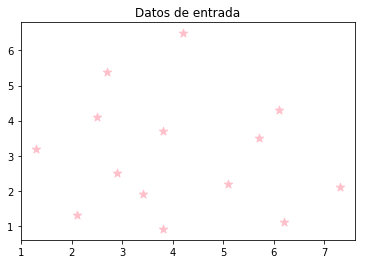

In [44]:
# definimos el numero de vecinos más cercanos
k = 5

# creamos una muestra para el test
test = [4.3, 2.7]


# CARPINTERIA

# Graficar los datos de entrada

plt.figure()
plt.title('Datos de entrada')
plt.scatter(X[:,0], X[:,1], marker = '*', s = 75, color='pink')
plt.show()

In [46]:
modelo_nn = NearestNeighbors(n_neighbors= k, algorithm='ball_tree').fit(X)
distancias, indices = modelo_nn.kneighbors(test)


print('Los vecinos mas cercanos')

for rank, index in enumerate(indices[0][:k], start=1):
    print(str(rank) + '----->', X[index])

Los vecinos mas cercanos
1-----> [ 5.1  2.2]
2-----> [ 3.8  3.7]
3-----> [ 3.4  1.9]
4-----> [ 2.9  2.5]
5-----> [ 5.7  3.5]


C:\Users\llondono2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


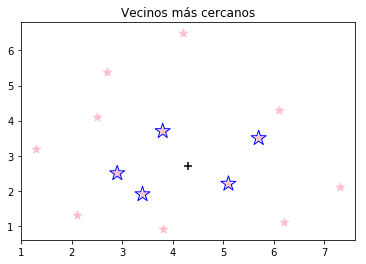

In [56]:
plt.figure()
plt.title('Vecinos más cercanos')
plt.scatter(X[:,0], X[:,1], marker = '*', s=75, color = 'pink')

plt.scatter(X[indices][0][:][:,0], X[indices][0][:][:,1], marker = '*', s=250, color='blue', facecolors= 'none')

plt.scatter(test[0], test[1], marker='+', s=75, color='k')

plt.show()

## Algoritmo para clasificador k-NN

In [61]:
# cargamos librerías
import numpy as np
import matplotlib.pyplot
import matplotlib.cm as cm
from sklearn import neighbors, datasets

In [63]:
archivo = 'data.txt'

data = np.genfromtxt(archivo, delimiter=',', skip_header = True)

X,y = data[:,:-1], data[:, -1].astype(np.int)

print(y)

[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0
 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1
 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2
 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3
 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0
 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1
 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2
 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3
 0 1 2 3]


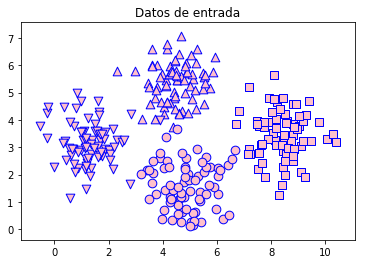

In [69]:
plt.figure()
plt.title('Datos de entrada')
marcadores = 'v^os'
mapper = [marcadores[i] for i in y] # repite la secuencia para llegar al tamaño 

for i in range(X.shape[0]):
    plt.scatter(X[i,0],X[i,1], marker=mapper[i], s = 75, edgecolors='blue', facecolors='pink')
    
plt.show()